# Campaign Events by State 2016

Ref: http://www.nationalpopularvote.com/campaign-events-2016

> Two-thirds (273 of 399) of the general-election campaign events in the 2016 presidential race were in just 6 states 
> (Florida, North Carolina, Pennsylvania, Ohio, Virginia, and Michigan). 

> 94% of the 2016 events (375 of the 399) were in 12 states (the 11 states identified earlier in the year as
> "battleground" states by Politico and The Hill and Arizona).  This fact validates the statement by former presidential
> candidate and Governor Scott Walker of Wisconsin on September 2, 2015, that “The nation as a whole is not going to
> elect the next president.  Twelve states are.” 


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
%matplotlib notebook

<IPython.core.display.Javascript object>


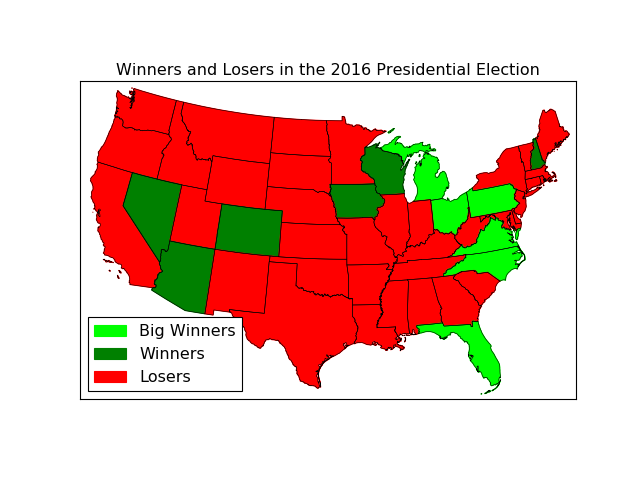

In [2]:
import matplotlib.patches as mpatches

# create the map
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
shp_info = m.readshapefile('./mapfiles/st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

favored_states = [
    "Florida",
    "North Carolina",
    "Pennsylvania",
    "Ohio",
    "Virginia",
    "Michigan",
    "Iowa",
    "New Hampshire",
    "Colorado",
    "Nevada",
    "Wisconsin",
    "Arizona"
]

colors = {}
statenames = []
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        if statename in favored_states:
            if statename in favored_states[:6]:
                color = "#00ff00"
            else:
                color = "green"
        else:
            color = "red"
        colors[statename] = color
    statenames.append(statename)
            
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape, seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        #color = rgb2hex(colors[statenames[nshape]])
        color = colors[statenames[nshape]]
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

red_patch = mpatches.Patch(color='red', label='Losers')
green_patch = mpatches.Patch(color='green', label='Winners')
lime_patch = mpatches.Patch(color='#00ff00', label='Big Winners')
plt.legend(handles=[lime_patch, green_patch, red_patch], loc='best')
plt.title("Winners and Losers in the 2016 Presidential Election")
plt.show()